In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("vgsales.csv", index_col='Rank')

In [3]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [5]:
df.drop(['Publisher', 'Name'], axis=1, inplace=True)
df

,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,
1,Wii,2006.0,Sports,41.49,29.02,3.77,8.46,82.74
2,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24
3,Wii,2008.0,Racing,15.85,12.88,3.79,3.31,35.82
4,Wii,2009.0,Sports,15.75,11.01,3.28,2.96,33.00
5,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...
16596,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,0.01
16597,GC,2003.0,Shooter,0.01,0.00,0.00,0.00,0.01
16598,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,0.01


In [6]:
data = df
data = data.dropna(subset=['Year'], axis=0).reset_index(drop=True)

In [7]:
data

,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,2006.0,Sports,41.49,29.02,3.77,8.46,82.74
1,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24
2,Wii,2008.0,Racing,15.85,12.88,3.79,3.31,35.82
3,Wii,2009.0,Sports,15.75,11.01,3.28,2.96,33.00
4,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...
16322,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,0.01
16323,GC,2003.0,Shooter,0.01,0.00,0.00,0.00,0.01
16324,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,0.01
16325,DS,2010.0,Puzzle,0.00,0.01,0.00,0.00,0.01


In [8]:
data.isnull().sum()

Platform        0
Year            0
Genre           0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [9]:
# Prepare the target variable
y = data['Global_Sales']

In [10]:
# Prepare the input features
features = data[['Platform','Genre','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
categorical_cols = ['Platform', 'Genre']

In [11]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [12]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [13]:
df1 = pd.read_csv("vgsales.csv", index_col='Rank')

In [14]:
df1.drop(['Publisher', 'Name'], axis=1, inplace=True)

In [15]:
df1 = df1.dropna(axis=0)

In [16]:
df1.head()

,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,
1,Wii,2006.0,Sports,41.49,29.02,3.77,8.46,82.74
2,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24
3,Wii,2008.0,Racing,15.85,12.88,3.79,3.31,35.82
4,Wii,2009.0,Sports,15.75,11.01,3.28,2.96,33.00
5,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37


In [17]:
from sklearn.preprocessing import LabelEncoder

# Select the columns to encode
columns_to_encode = ["Genre", "Platform"]

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Apply label encoding to the selected columns
for column in columns_to_encode:
    df1.loc[:, column] = encoder.fit_transform(df1[column])

# The "Genre" and "Platform" columns are now label-encoded


In [18]:
df1.corr()

,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,1.000000,0.167823,0.027574,0.042067,0.046957,-0.078994,0.054892,0.028216
Year,0.167823,1.000000,-0.124994,-0.091402,0.006014,-0.169316,0.041058,-0.074735
Genre,0.027574,-0.124994,1.000000,0.018055,0.017110,0.030456,0.009959,0.022297
NA_Sales,0.042067,-0.091402,0.018055,1.000000,0.768936,0.451285,0.634508,0.941268
EU_Sales,0.046957,0.006014,0.017110,0.768936,1.000000,0.436414,0.726266,0.903271
JP_Sales,-0.078994,-0.169316,0.030456,0.451285,0.436414,1.000000,0.290653,0.612794
Other_Sales,0.054892,0.041058,0.009959,0.634508,0.726266,0.290653,1.000000,0.747974
Global_Sales,0.028216,-0.074735,0.022297,0.941268,0.903271,0.612794,0.747974,1.000000


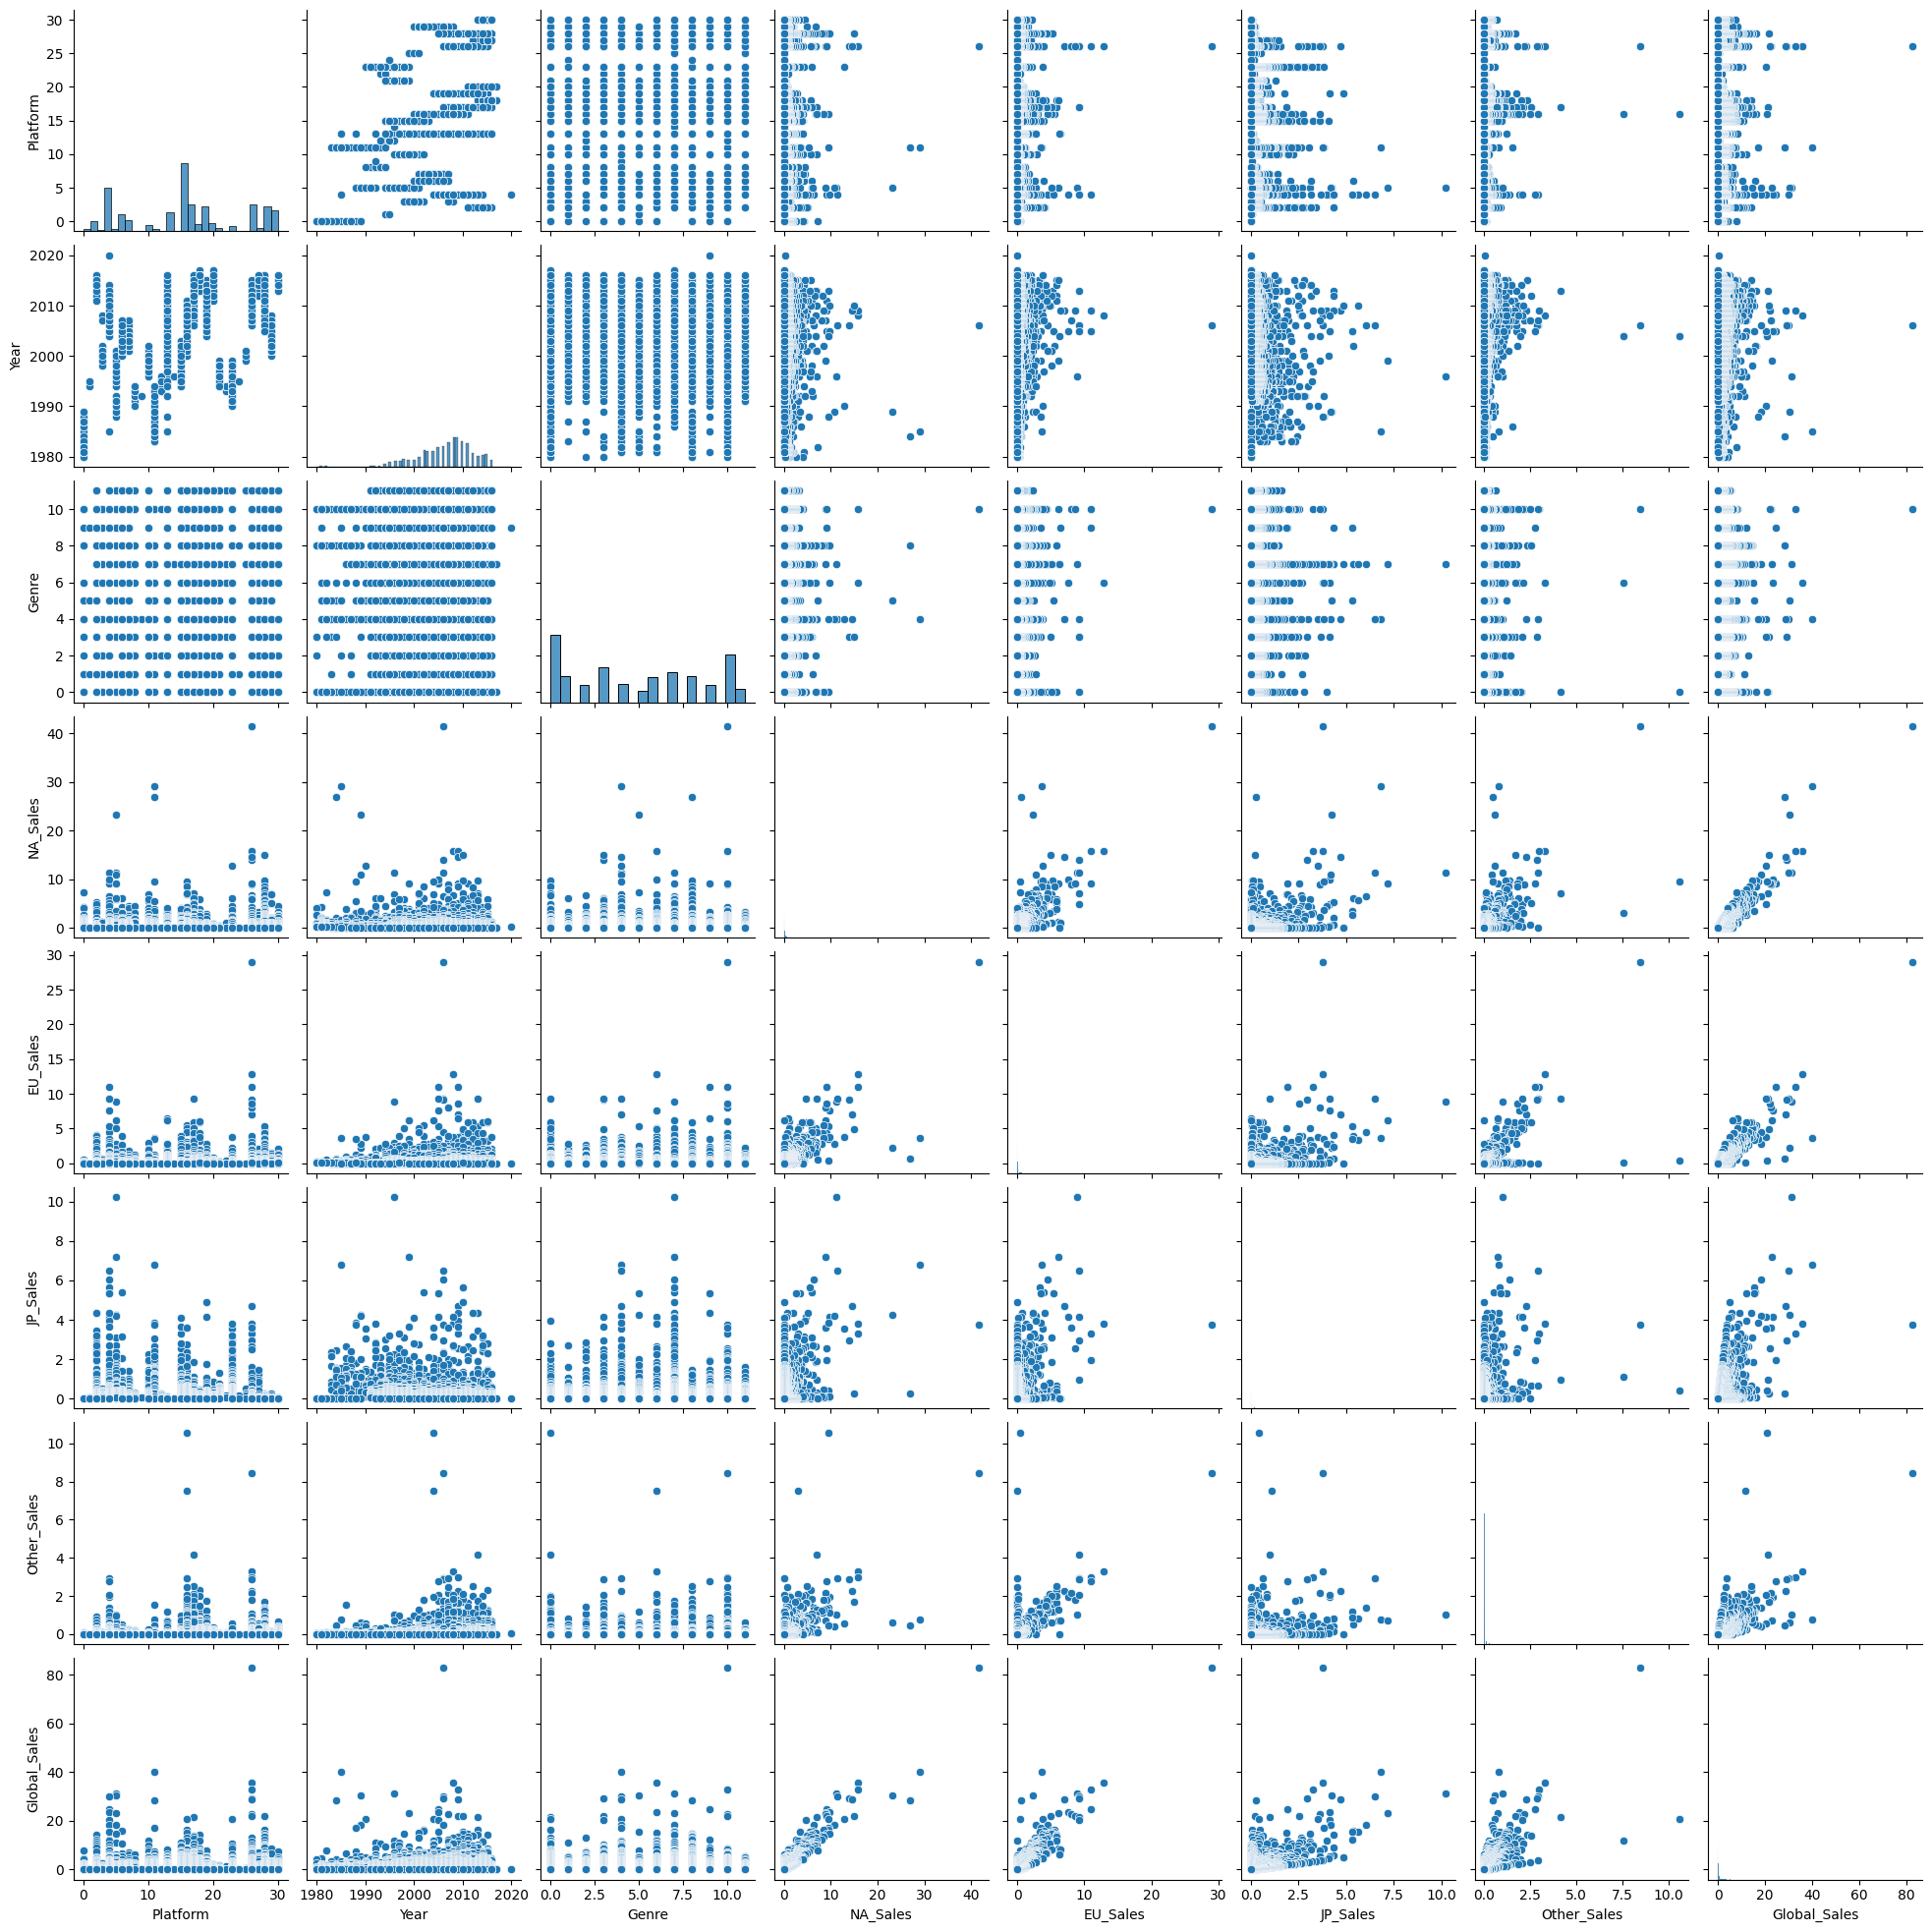

In [19]:
import seaborn as sns
sns.pairplot(df1)

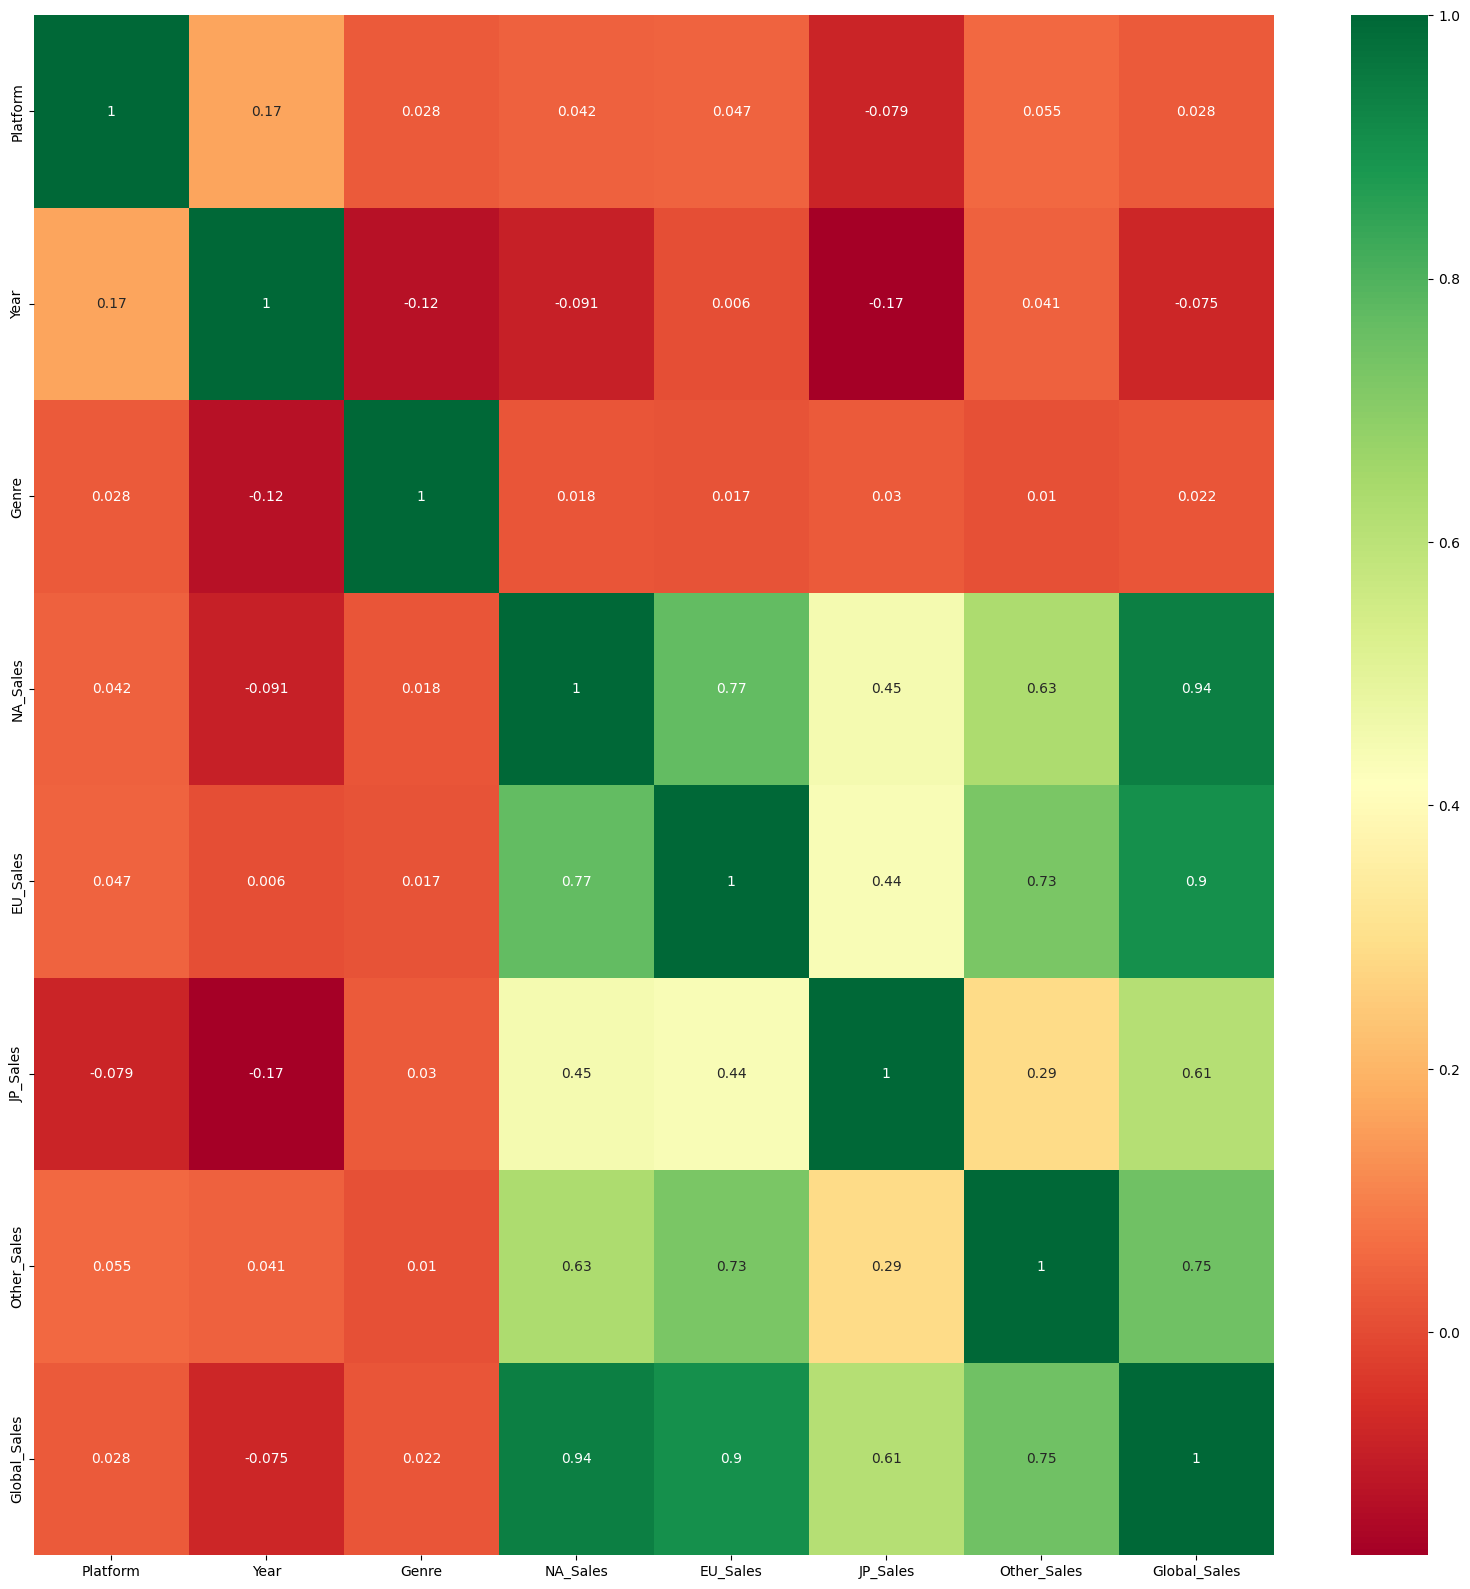

In [20]:
#get correlations of each features in dataset
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [29]:
import plotly.express as px

genre_count = df1['Genre'].value_counts()

fig = px.bar(x=genre_count.index, y=genre_count.values)
fig.update_traces(marker_color='maroon', marker_line_color='black', marker_line_width=1.5)
fig.update_layout(
    title='Number of Games Released by Genre',
    xaxis_title='Genre',
    yaxis_title='Count',
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    plot_bgcolor='white',
    font_family='Arial',
    title_font_size=24,
    title_font_color='maroon',
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12
)
fig.show()


In [30]:
import plotly.express as px

year_count = df1['Year'].value_counts().sort_index()

fig = px.bar(x=year_count.index, y=year_count.values)
fig.update_traces(marker_color='limegreen', marker_line_color='black', marker_line_width=1.5)
fig.update_layout(
    title='Number of Games Released by Year',
    xaxis_title='Year',
    yaxis_title='Count',
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    plot_bgcolor='white',
    font_family='Arial',
    title_font_size=24,
    title_font_color='limegreen',
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12
)
fig.show()


In [23]:
import plotly.express as px

platform_count = df1['Platform'].value_counts()

fig = px.bar(x=platform_count.index, y=platform_count.values)
fig.update_traces(marker_color='blue', marker_line_color='black', marker_line_width=1.5)
fig.update_layout(
    title='Number of Games Released by Platform',
    xaxis_title='Platform',
    yaxis_title='Count',
    xaxis_tickangle=-45,
    plot_bgcolor='white',
    font_family='Arial',
    title_font_size=24,
    title_font_color='blue',
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12,
    showlegend=False
)
fig.show()


In [24]:
# Convert features to a DataFrame
features_df = pd.DataFrame (features)

In [25]:
# Create the pipeline for one-hot encoding and conversion to numeric format
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
transformers=[('encoder', OneHotEncoder(), categorical_cols)],
remainder= 'passthrough'
)

In [26]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features_df, y,
test_size=0.20, random_state=42)

In [27]:
# Train the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
model = Pipeline([
( 'preprocessor',preprocessor),
('regressor', RandomForestRegressor())
])
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['Platform', 'Genre'])])),
                ('regressor', RandomForestRegressor())])

In [28]:
# Save the model as a pickle file
import pickle
pickle.dump(model, open("model1.pkl", "wb"))